In [1]:
include("preamble.jl")

/Users/a1627293/Documents/SFFMProject/DFQExamples.jl/notebooks


  Activating environment at `~/Documents/SFFMProject/DFQExamples.jl/Project.toml`


   Resolving package versions...


  No Changes to `~/Documents/SFFMProject/DFQExamples.jl/Project.toml`
  No Changes to `~/Documents/SFFMProject/DFQExamples.jl/Manifest.toml`


Precompiling 

project...


  ✓ DiscretisedFluidQueues


  1 dependency successfully precompiled in 11 seconds (138 already precompiled)


In [2]:
T = Matrix([0.0]')
c = [1.0]
model = FluidQueue(T,c)

nodes = collect(0.0:0.5:5);

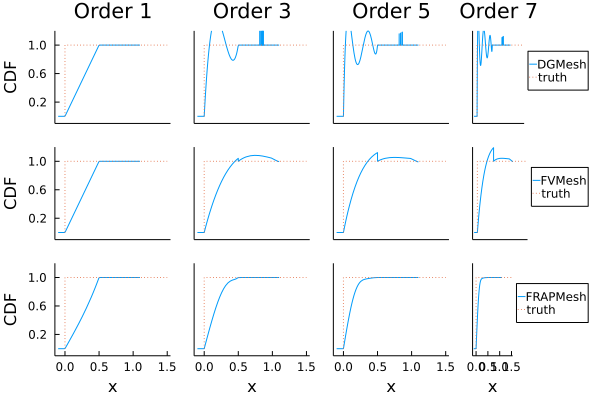

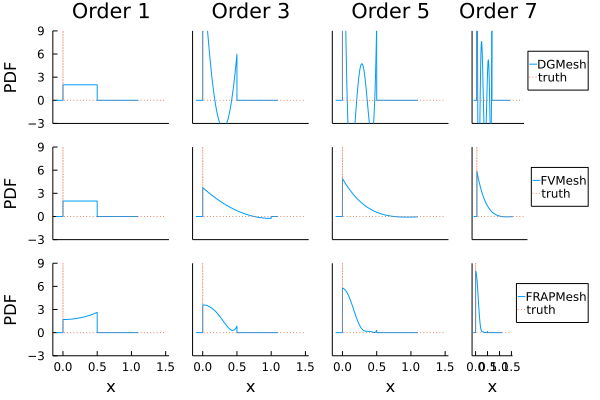

In [3]:

for plt_type in (cdf,pdf)
    p = plot(layout=(3,4))
    linetypes = [:solid,:solid,:solid]
    c_order = 0
    for order in 1:2:7
        c_order += 1
        c_mesh = 0
        for mtype in (DGMesh, FVMesh, FRAPMesh)
            c_mesh += 1
            mesh = mtype(nodes,order)

            dq = DiscretisedFluidQueue(model,mesh)

            d0 = interior_point_mass(eps(),1,dq)

            rec = plt_type(d0)
            
            std_plot(args...; kwargs...) = plot!(
                p.layout.grid[c_mesh,c_order],
                x->rec(x,1),
                nodes[1]-0.1, 1.1;
                ylim=((plt_type==pdf) ? (-3,9) : (-0.1,1.2)),
                linestyle=linetypes[c_mesh],
                xticks=false,
                yticks=false,
                grid=false,
                kwargs...,
            )
            if c_order == 1
                std_plot(;label=false,ylabel=uppercase(string(plt_type)),legend=false)
                yticks!(p.layout.grid[c_mesh,c_order], ((plt_type==pdf) ? (-3:3:9) : (-0.2:0.4:1.2)))
            elseif c_order == 4
                std_plot(;label=string(mtype),legend=:outerright)
            else
                std_plot(;label=false,legend=false)
            end
            if c_mesh == 1 
                plot!(p.layout.grid[c_mesh,c_order]; title="Order "*string(order))
            elseif c_mesh == 3
                xticks!(p.layout.grid[c_mesh,c_order], 0:0.5:1.5)
                plot!(p.layout.grid[c_mesh,c_order]; xlabel="x")
            end
            std_plot2(args... ; kwargs...) = if plt_type==cdf
                plot!(
                    p.layout.grid[c_mesh,c_order],
                    [0.0;eps();eps();1.5],
                    [0.0;0.0;1.0;1.0],
                    args...;
                    linestyle=:dot,
                    kwargs...,
                )
            elseif plt_type==pdf
                plot!(
                    p.layout.grid[c_mesh,c_order],
                    [0.0;eps();2*eps();1.5],
                    [0.0;100;0.0;0.0],
                    args...;
                    subplot=c_order,
                    linestyle=:dot,
                    kwargs...
                )
            end
            if c_order==4
                std_plot2(;label="truth",legend=:outerright)
            else
                std_plot2(;label=false)
            end
        end
    end
    display(p)
end

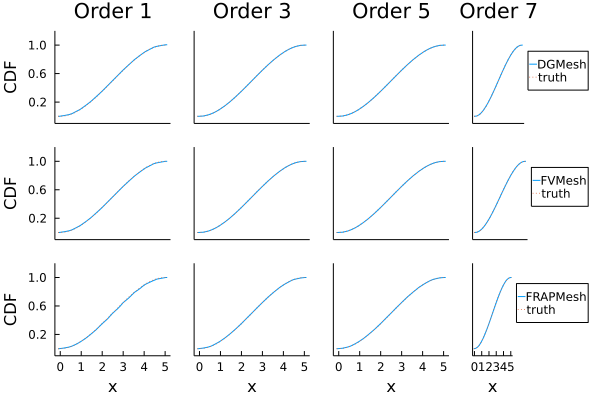

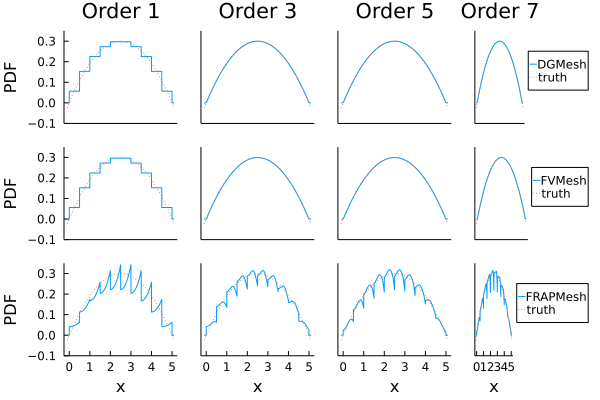

In [4]:

for plt_type in (cdf,pdf)
    p = plot(layout=(3,4))
    linetypes = [:solid,:solid,:solid]
    c_order = 0
    for order in 1:2:7
        c_order += 1
        c_mesh = 0
        for mtype in (DGMesh, FVMesh, FRAPMesh)
            c_mesh += 1
            mesh = mtype(nodes,order)

            dq = DiscretisedFluidQueue(model,mesh)

            f(x,i) = (2.5^2-(x-2.5)^2)/(125/6)
            d0 = SFMDistribution(f,dq)

            rec = plt_type(d0)
            
            std_plot(args...; kwargs...) = plot!(
                p.layout.grid[c_mesh,c_order],
                x->rec(x,1),
                nodes[1]-0.1, 5.1;
                ylim=((plt_type==pdf) ? (-0.1,0.35) : (-0.1,1.2)),
                linestyle=linetypes[c_mesh],
                xticks=false,
                yticks=false,
                grid=false,
                kwargs...,
            )
            if c_order == 1
                std_plot(;label=false,ylabel=uppercase(string(plt_type)),legend=false)
                yticks!(p.layout.grid[c_mesh,c_order], ((plt_type==pdf) ? (-0.1:0.1:0.35) : (-0.2:0.4:1.2)))
            elseif c_order == 4
                std_plot(;label=string(mtype),legend=:outerright)
            else
                std_plot(;label=false,legend=false)
            end
            if c_mesh == 1 
                plot!(p.layout.grid[c_mesh,c_order]; title="Order "*string(order))
            elseif c_mesh == 3
                xticks!(p.layout.grid[c_mesh,c_order], 0:1:5)
                plot!(p.layout.grid[c_mesh,c_order]; xlabel="x")
            end
            std_plot2(args... ; kwargs...) = if plt_type==cdf
                int_f(x) = (0<x<5)*(5*x^2/2-x^3/3)/(125/6) + (x>=5)
                plot!(
                    p.layout.grid[c_mesh,c_order],
                    x->int_f(x),
                    nodes[1]-0.1, 5.1,
                    args...;
                    linestyle=:dot,
                    kwargs...,
                )
            elseif plt_type==pdf
                plot!(
                    p.layout.grid[c_mesh,c_order],
                    x->f(x,1),
                    nodes[1]-0.1, 5.1, 
                    args...;
                    subplot=c_order,
                    linestyle=:dot,
                    kwargs...
                )
            end
            if c_order==4
                std_plot2(;label="truth",legend=:outerright)
            else
                std_plot2(;label=false)
            end
        end
    end
    display(p)
end

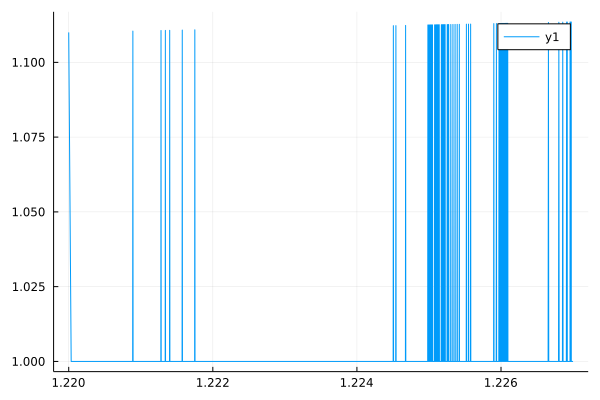

In [23]:
nodes = collect(0.0:1.0:5);
mesh = DGMesh(nodes,3)

dq = DiscretisedFluidQueue(model,mesh)

d0 = interior_point_mass(eps(),1,dq)
rec = cdf(d0)

f = pdf(d0)

plot(x->rec(x,1),1.22,1.227)

In [25]:
xvals = 1.22:0.0005:1.227
[rec.(xvals,1) collect(xvals) f.(xvals,1)]

15×3 Matrix{Float64}:
 1.11     1.22    0.0
 1.0      1.2205  0.0
 1.0      1.221   0.0
 1.11075  1.2215  0.0
 1.0      1.222   0.0
 1.0      1.2225  0.0
 1.1115   1.223   0.0
 1.0      1.2235  0.0
 1.0      1.224   0.0
 1.0      1.2245  0.0
 1.0      1.225   0.0
 1.0      1.2255  0.0
 1.0      1.226   0.0
 1.11325  1.2265  0.0
 1.0      1.227   0.0

In [36]:
F(y) = DiscretisedFluidQueues.gauss_lobatto_quadrature(x->f(x,1),1.0,y,3)
y=1.22

1.22

In [37]:
f(y,1)

0.0

In [41]:
f.(DiscretisedFluidQueues.gauss_lobatto_points(1.0,y,3),1)

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [60]:
V = DiscretisedFluidQueues.vandermonde(2)
(1.0./V.w .* V.inv'*V.inv * (V.D*V.inv) .* V.w')'
V.inv*V.D

2×2 Matrix{Float64}:
 0.0  1.73205
 0.0  0.0

In [246]:
n=2
V = DiscretisedFluidQueues.vandermonde(n)
V3 = DiscretisedFluidQueues.vandermonde(n+1)
g(x) = DiscretisedFluidQueues.lagrange_polynomials([-1.0;1.0],x)'* (V.inv'*V.inv * (V.D*V.inv))'
g(-1.0)
[2 -1]*V.inv'*[I(2) [0;0]] * (V3.inv*V3.D)' * V3.V' 

1×3 Matrix{Float64}:
 -1.5  -1.5  -1.5

In [247]:
#V.inv'*[I(n) zeros(n)] * (V3.inv*V3.D)' * V3.V' # map to n+1 basis and take derivative 
Tr = V.inv'*[I(n) zeros(n)] #* V3.V' # map to degree n+1 legendre basis

2×3 Matrix{Float64}:
 0.707107  -0.408248  0.0
 0.707107   0.408248  0.0

In [248]:
G = (V3.inv*V3.D)'

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0          0.0      0.0
 1.73205      0.0      0.0
 6.66134e-16  3.87298  0.0

In [249]:
a = [2 -1]
Gstar = copy(G)
Gstar[:,end] .= V3.V[1,:]
Gstar

3×3 Matrix{Float64}:
 0.0          0.0       0.707107
 1.73205      0.0      -1.22474
 6.66134e-16  3.87298   1.58114

In [250]:
b = a*Tr
b[end] = 0.0 # extra condition for unique inverse
b

1×3 Matrix{Float64}:
 0.707107  -1.22474  0.0

In [251]:
c = b/Gstar * V3.V'

1×3 Matrix{Float64}:
 -2.09312e-16  1.25  1.0

In [252]:
h3(1.0)

1.0000000000000002

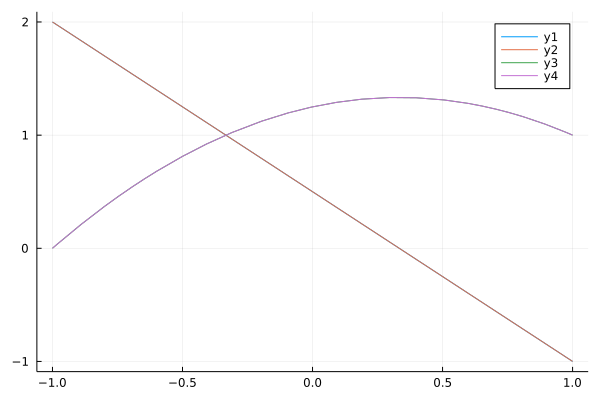

In [253]:
h0(y) = ([2 -1]*DiscretisedFluidQueues.lagrange_polynomials([-1.0;1.0],y))[1]
plot(h0,-1,1)
h(y) = DiscretisedFluidQueues.lagrange_interpolation(x->0.5-1.5*x,-1.0,1.0,3)(y)
plot(h,-1,1)
h2(y) = ([2 0.5 -1]*DiscretisedFluidQueues.lagrange_polynomials([-1.0;0.0;1.0],y))[1]
plot!(h2,-1,1)
h3(y) = (c*DiscretisedFluidQueues.lagrange_polynomials([-1.0;0.0;1.0],y))[1]
plot!(h3,-1,1)
h4(y) = 0.5*y-1.5*y^2/2 + 5/4
plot!(h4,-1,1)

In [68]:
V = DiscretisedFluidQueues.vandermonde(4)
(1.0./V.w .* V.inv'*V.inv * (V.D*V.inv) .* V.w')'
V.inv*V.D
V.V

4×4 Matrix{Float64}:
 0.707107  -1.22474    1.58114   -1.87083
 0.707107  -0.547723  -0.316228   0.83666
 0.707107   0.547723  -0.316228  -0.83666
 0.707107   1.22474    1.58114    1.87083

In [42]:
display(F(y))
display(DiscretisedFluidQueues.gauss_lobatto_points(1.0,y,3))
display(DiscretisedFluidQueues.gauss_lobatto_points(1.0,y+0.001,3))
display(DiscretisedFluidQueues.gauss_lobatto_weights(1.0,y,3))

0.11000002622604614

3-element Vector{Float64}:
 0.9999999999999999
 1.1099999999999999
 1.2199999999999998

3-element Vector{Float64}:
 1.0
 1.1105
 1.221

3-element Vector{Float64}:
 0.03666666666666667
 0.14666666666666667
 0.03666666666666667

7

1

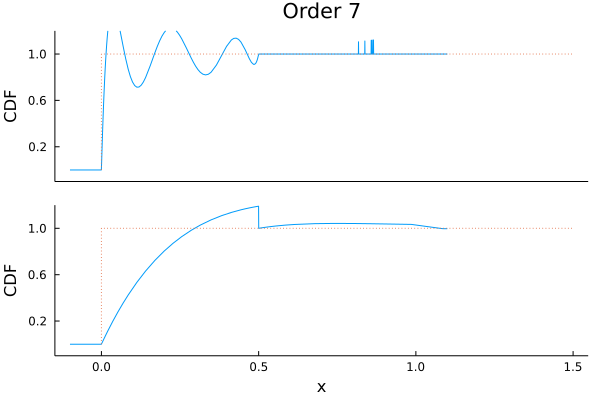

7

1

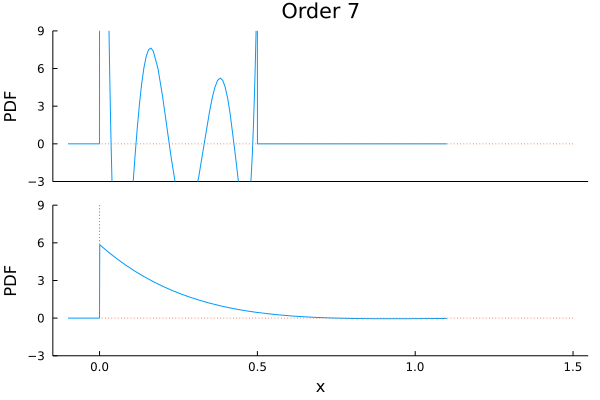

In [7]:

for plt_type in (cdf,pdf)
    p = plot(layout=(2,1))
    linetypes = [:solid,:solid,:solid]
    c_order = 0
    for order in [7]
        c_order += 1
        c_mesh = 0
        for mtype in (DGMesh, FVMesh)
            c_mesh += 1
            mesh = mtype(nodes,order)

            dq = DiscretisedFluidQueue(model,mesh)

            d0 = interior_point_mass(eps(),1,dq)
            # display(d0)
            rec = plt_type(d0)

            display(n_bases_per_cell(dq))            

            
            std_plot(args...; kwargs...) = plot!(
                p.layout.grid[c_mesh,c_order],
                x->rec(x,1),
                nodes[1]-0.1, 1.1;
                ylim=((plt_type==pdf) ? (-3,9) : (-0.1,1.2)),
                linestyle=linetypes[c_mesh],
                xticks=false,
                yticks=false,
                grid=false,
                kwargs...,
            )
            if c_order == 1
                std_plot(;label=false,ylabel=uppercase(string(plt_type)),legend=false)
                yticks!(p.layout.grid[c_mesh,c_order], ((plt_type==pdf) ? (-3:3:9) : (-0.2:0.4:1.2)))
            elseif c_order == 1
                std_plot(;label=string(mtype),legend=:outerright)
            else
                std_plot(;label=false,legend=false)
            end
            if c_mesh == 1 
                plot!(p.layout.grid[c_mesh,c_order]; title="Order "*string(order))
            elseif c_mesh == 2
                xticks!(p.layout.grid[c_mesh,c_order], 0:0.5:1.5)
                plot!(p.layout.grid[c_mesh,c_order]; xlabel="x")
            end
            std_plot2(args... ; kwargs...) = if plt_type==cdf
                plot!(
                    p.layout.grid[c_mesh,c_order],
                    [0.0;eps();eps();1.5],
                    [0.0;0.0;1.0;1.0],
                    args...;
                    linestyle=:dot,
                    kwargs...,
                )
            elseif plt_type==pdf
                plot!(
                    p.layout.grid[c_mesh,c_order],
                    [0.0;eps();2*eps();1.5],
                    [0.0;100;0.0;0.0],
                    args...;
                    subplot=c_order,
                    linestyle=:dot,
                    kwargs...
                )
            end
            if c_order==4
                std_plot2(;label="truth",legend=:outerright)
            else
                std_plot2(;label=false)
            end
        end
    end
    display(p)
end

In [10]:
# check FV CDF matches quadrature of pdf